<a href="https://colab.research.google.com/github/FlorianWoelki/titanic_classification/blob/master/titanic_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Download the dataset

Click this [link](https://www.kaggle.com/c/titanic/overview) to go to the kaggle titanic dataset.

First of all, we need to download the dataset. For that we will use the google colab helper function to upload files. In this case, we will upload the kaggle json file with the key inside.

In [0]:
from google.colab import files
files.upload()

If we uploaded the file correctly, we can move the file into a new .kaggle folder. This will be useful for the kaggle cli.

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

Now, we will download the dataset by using the kaggle cli.

In [3]:
!kaggle competitions download -c titanic
!ls

  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 49.3MB/s]
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 28.2MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 3.16MB/s]
 gender_submission.csv	 kaggle.json   test.csv
'kaggle (1).json'	 sample_data   train.csv


## Check the data

In this section we will explore the data.

> The following table explains the data.

| Variable | Definition                                 | Key                                            |
|----------|--------------------------------------------|------------------------------------------------|
| survival | Survival                                   | 0 = No, 1 = Yes                                |
| pclass   | Ticket Class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| sex      | Sex                                        |                                                |
| Age      | Age in years                               |                                                |
| sibsp    | # of siblings / spouses aboard the titanic |                                                |
| parch    | # of parents / children aboard the titanic |                                                |
| ticket   | Ticket number                              |                                                |
| fare     | Passenger fare                             |                                                |
| cabin    | Cabin number                               |                                                |
| embarked | Port of embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |

We will import pandas to import the .csv file and matplotlib to plot the data.

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

Then we will import the .csv file and save it as a dataframe for exploring the data.

After that we will print out the head part of our data.

In [5]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


I am now interested in the data of the survived people and the people, who not survived this crisis.

First I will plot the percentage of how many people survived and not in a bar chart.

Then I will plot the age by the survived percentage. Basically the age of people, who survived and the age of people who did not survive. For this I will use a scatter plot.

Furthermore, I was interested by seeing the passenger class. So, how many people in percent were in class 3, 2 and 1.

For the fourth plot, I plotted a kde, to see the passenger class with the age of the person.

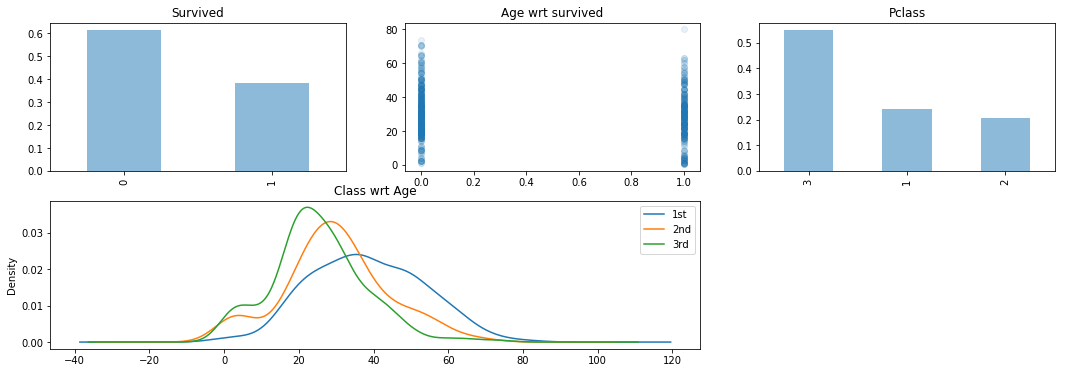

In [6]:
fig = plt.figure(figsize=(18, 6))

plt.subplot2grid((2, 3), (0, 0))
df.Survived.value_counts(normalize=True).plot(kind='bar', alpha=0.5)
plt.title('Survived')

plt.subplot2grid((2, 3), (0, 1))
plt.scatter(df.Survived, df.Age, alpha=0.1)
plt.title('Age wrt survived')

plt.subplot2grid((2, 3), (0, 2))
df.Pclass.value_counts(normalize=True).plot(kind='bar', alpha=0.5)
plt.title('Pclass')

plt.subplot2grid((2, 3), (1, 0), colspan=2)
for x in [1, 2, 3]:
  df.Age[df.Pclass == x].plot(kind='kde')
plt.title('Class wrt Age')
plt.legend(('1st', '2nd', '3rd'))

plt.show()

I was also interested, on the survived sex percentage. 

We can see with these plots, that woman were more valuable than mens. So a lot of woman survived.

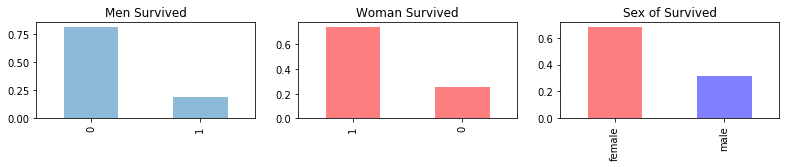

In [7]:
fig = plt.figure(figsize=(18, 6))

female_color = '#FA0000'

plt.subplot2grid((3, 4), (0, 0))
df.Survived[df.Sex == 'male'].value_counts(normalize=True).plot(kind='bar', alpha=0.5)
plt.title('Men Survived')

plt.subplot2grid((3, 4), (0, 1))
df.Survived[df.Sex == 'female'].value_counts(normalize=True).plot(kind='bar', alpha=0.5, color=female_color)
plt.title('Woman Survived')

plt.subplot2grid((3, 4), (0, 2))
df.Sex[df.Survived == 1].value_counts(normalize=True).plot(kind='bar', alpha=0.5, color=[female_color, 'b'])
plt.title('Sex of Survived')

plt.show()

## Normalize the data

In this section I will normalize the data, so the deep learning model has a better time and can understand every single column.

In [0]:
def normalize_data(data):
  data['Fare'] = data['Fare'].fillna(data['Fare'].dropna().median())
  data['Age'] = data['Age'].fillna(data['Age'].dropna().median())
  
  data.loc[data['Sex'] == 'male', 'Sex'] = 0
  data.loc[data['Sex'] == 'female', 'Sex'] = 1
  
  data['Embarked'] = data['Embarked'].fillna('S')
  data.loc[data['Embarked'] == 'S', 'Embarked'] = 0
  data.loc[data['Embarked'] == 'C', 'Embarked'] = 1
  data.loc[data['Embarked'] == 'Q', 'Embarked'] = 2

In [0]:
train = df
normalize_data(train)

## Building and training the model

In this section I will build and train the model with tensorflow.

We will use a densed neural network with 7 input neurons and 1 output neuron. It will output if the person survive or not.

In [0]:
import tensorflow as tf

In [0]:
BATCH_SIZE = 32
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(7,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [0]:
labels = train['Survived'].values
feature_names = ['Pclass', 'Age', 'Fare', 'Embarked', 'Sex', 'SibSp', 'Parch']
features = train[feature_names].values

In [17]:
history = model.fit(features, labels, epochs=50, batch_size=BATCH_SIZE, validation_split=0.2, shuffle=True)

Train on 712 samples, validate on 179 samples
Epoch 1/50
712/712 [==============================] - 1s 2ms/sample - loss: 0.8457 - acc: 0.6334 - val_loss: 0.6614 - val_acc: 0.6704
Epoch 2/50
712/712 [==============================] - 0s 107us/sample - loss: 0.7127 - acc: 0.6559 - val_loss: 0.5557 - val_acc: 0.7486
Epoch 3/50
712/712 [==============================] - 0s 111us/sample - loss: 0.7384 - acc: 0.6545 - val_loss: 0.5357 - val_acc: 0.7598
Epoch 4/50
712/712 [==============================] - 0s 110us/sample - loss: 0.6137 - acc: 0.6896 - val_loss: 0.7760 - val_acc: 0.6480
Epoch 5/50
712/712 [==============================] - 0s 109us/sample - loss: 0.7319 - acc: 0.6475 - val_loss: 0.5390 - val_acc: 0.8156
Epoch 6/50
712/712 [==============================] - 0s 106us/sample - loss: 0.6050 - acc: 0.7121 - val_loss: 0.6213 - val_acc: 0.6816
Epoch 7/50
712/712 [==============================] - 0s 108us/sample - loss: 0.5488 - acc: 0.7556 - val_loss: 0.4581 - val_acc: 0.7877
Epoc

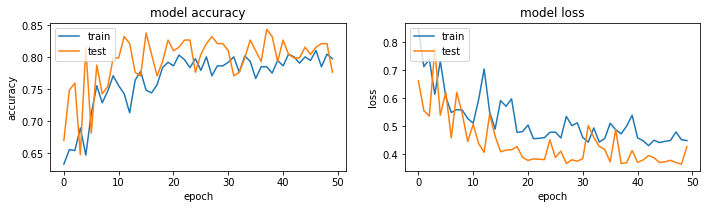

In [18]:
fig = plt.figure(figsize=(18, 6))

plt.subplot2grid((2, 3), (0, 0))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot2grid((2, 3), (0, 1))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.show()

In [0]:
test_data = pd.read_csv('train.csv')
normalize_data(test_data)
test_data = test_data[feature_names]
predictions = model.predict(test_data[feature_names], batch_size=BATCH_SIZE)

## Visualize predicted data

In this section we will visualize the predicted data.

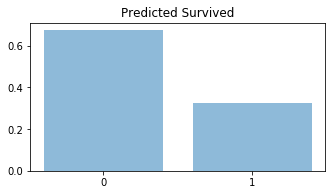

In [20]:
import numpy as np

fig = plt.figure(figsize=(18, 6))

predictions = np.around(predictions)
pred_zeros = (predictions == 0).sum()
pred_ones = (predictions == 1).sum()

plt.subplot2grid((2, 3), (0, 1))
plt.title('Predicted Survived')
plt.xticks(np.arange(2), ('0', '1'))
plt.bar([0, 1], [pred_zeros/len(predictions), pred_ones/len(predictions)], alpha=0.5)

plt.show()

In [21]:
print('Predicted Dead people', pred_zeros)
print('Predicted Alive people', pred_ones)

Predicted Dead people 603
Predicted Alive people 288
